(28, 28)


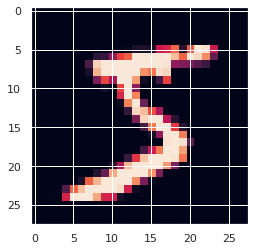

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train[0].shape)
plt.imshow(X_train[0])

In [8]:
model = models.Sequential()
model.add(layers.Dense(100, input_dim=28 * 28, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy')

In [9]:
trainX = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
testX = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])

Epoch 1/2
120/120 [==============================] - 0s 2ms/step - loss: 0.2052
Epoch 2/2
120/120 [==============================] - 0s 2ms/step - loss: 0.1997


Text(30.5, 0.5, 'Actual')

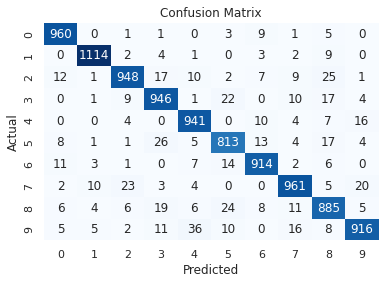

In [20]:
history = model.fit(trainX, y=utils.to_categorical(y_train), batch_size=500, epochs=2)

predictions = model.predict(testX)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))

plt.figure()
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

meanEst = np.mean(X_train, axis = (0, 1, 2))
stdevEst = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - meanEst) / stdevEst
X_test = (X_test - meanEst) / stdevEst

Epoch 1/2
120/120 [==============================] - 0s 2ms/step - loss: 0.1676
Epoch 2/2
120/120 [==============================] - 0s 2ms/step - loss: 0.1222


Text(30.5, 0.5, 'Actual')

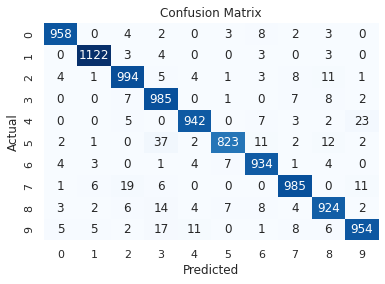

In [23]:
trainX = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
testX = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])
history = model.fit(trainX, y=utils.to_categorical(y_train), batch_size=500, epochs=2)

predictions = model.predict(testX)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))

plt.figure()
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')